https://www.kaggle.com/shivamb/netflix-shows?select=netflix_titles.csv

# Limpieza y preprocesado de datos --> garbage in, garbage out
https://towardsdatascience.com/a-straightforward-guide-to-cleaning-and-preparing-data-in-python-8c82f209ae33

<img src="https://miro.medium.com/max/1400/0*x7WkyWCBkQcsQYkY">

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("netflix_titles.csv")

# Analisis exploratorio simple

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
df.shape

(7787, 12)

In [ ]:
df[df["director"].isnull()].head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


In [ ]:
df.isnull().sum().sort_values(ascending=False)

director        2389
cast             718
country          507
date_added        10
rating             7
description        0
listed_in          0
duration           0
release_year       0
title              0
type               0
show_id            0
dtype: int64

In [ ]:
(df.isnull().sum().sort_values(ascending=False) / df.shape[0]) * 100

director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
rating           0.089893
description      0.000000
listed_in        0.000000
duration         0.000000
release_year     0.000000
title            0.000000
type             0.000000
show_id          0.000000
dtype: float64

# Tratando Datos faltantes
4 metodos distintos:
* Me la suda
* Me la suda pero no quiero borrar datos (manera improvisada)
* Solución mas o menos buena
* Solución optima si verdaderamente me importan los datos (manera estadisticamente correcta)

## 1. Me la suda
Consiste en borrarse la fila entera y hacerme el loco

In [ ]:
filas_sin_director = df[df['director'].isnull()].index
df_melasuda = df.drop(filas_sin_director, axis=0).copy()
print(df_melasuda.shape)
(df_melasuda.isnull().sum().sort_values(ascending=False) / df_melasuda.shape[0]) * 100

(5398, 12)


cast            7.762134
country         3.797703
rating          0.074102
description     0.000000
listed_in       0.000000
duration        0.000000
release_year    0.000000
date_added      0.000000
director        0.000000
title           0.000000
type            0.000000
show_id         0.000000
dtype: float64

## 2. Me la suda pero no quiero borrar datos
Consiste en rellenarlos con un valor constante

In [ ]:
df_constante = df.copy()
df_constante["director"] = df_constante["director"].fillna("Anónimo")
print(df_constante.shape)
(df_constante.isnull().sum().sort_values(ascending=False) / df_constante.shape[0]) * 100

(7787, 12)


cast            9.220496
country         6.510851
date_added      0.128419
rating          0.089893
description     0.000000
listed_in       0.000000
duration        0.000000
release_year    0.000000
director        0.000000
title           0.000000
type            0.000000
show_id         0.000000
dtype: float64

In [ ]:
df_constante.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Anónimo,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


## 3. Solución mas o menos buena
Consiste en asignarle una medida de tendencia central (Media, mediana o moda) en caso de ser un valor numérico. Si es un valor categórico puede ser el mas representativo

In [ ]:
df["rating"].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [ ]:
mode = ''.join(df['rating'].mode())
mode

'TV-MA'

In [ ]:
df_sol1 = df.copy()
df_sol1['rating'] = df_sol1['rating'].fillna(mode)

In [ ]:
print(df_sol1.shape)
(df_sol1.isnull().sum().sort_values(ascending=False) / df_sol1.shape[0]) * 100

(7787, 12)


director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
description      0.000000
listed_in        0.000000
duration         0.000000
rating           0.000000
release_year     0.000000
title            0.000000
type             0.000000
show_id          0.000000
dtype: float64

## Manera sofisticada
Consiste en utilizar todos los datos de la fila para predecir el faltante. Ojo: solo sirve para faltantes numéricos.

https://scikit-learn.org/stable/modules/impute.html

In [ ]:
# import numpy as np
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# imp = IterativeImputer(max_iter=10, random_state=0)
# imp.fit_transform(df)

# Outliers

Un outlier es un dato que difiere significamente del resto de observaciones. 

Parte del trabajo del data scientist es definir si los outliers estan dentro de la naturaleza de los datos y si provienen de alguna fuente de error.


In [ ]:
df_movie = df[df['type']=='Movie']
df_movie = df_movie.assign(minute = df_movie['duration'].str.extract(r'(\d+)', expand=False).astype(int))
df_movie.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minute
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,93
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",78
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",80


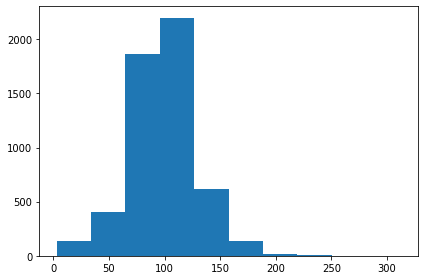

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1)
plt.hist(df_movie['minute'])
fig.tight_layout()

## Boxplot

<img src="https://r-coder.com/wp-content/uploads/2020/06/boxplot-esquema.png">

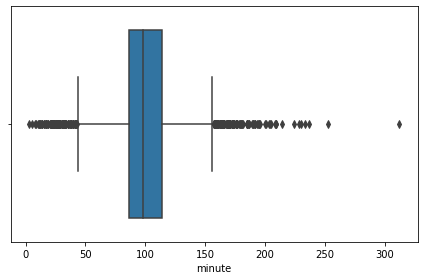

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(nrows=1, ncols=1)
ax = sns.boxplot(x=df_movie['minute'])
fig.tight_layout()

In [ ]:
df_movie['minute'].describe()

count    5377.000000
mean       99.307978
std        28.530881
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: minute, dtype: float64

In [ ]:
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
fig = go.Figure()
fig.add_box(x=df_movie['minute'], text=df_movie['minute'])
iplot(fig)

# Outliers Categóricos

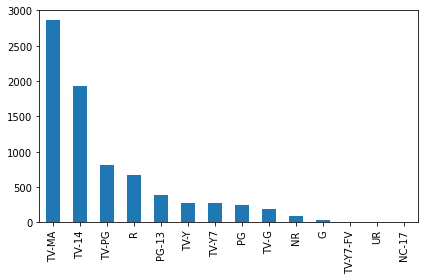

In [ ]:
fig=df['rating'].value_counts().plot.bar().get_figure()
fig.tight_layout()

## ¿ Qué hacemos con los Outliers?

In [ ]:
df_movie[(df_movie['minute']<43) | (df_movie['minute']>158)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minute
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...,37
100,s101,Movie,3 Idiots,Rajkumar Hirani,"Aamir Khan, Kareena Kapoor, Madhavan, Sharman ...",India,"August 1, 2019",2009,PG-13,164 min,"Comedies, Dramas, International Movies",While attending one of India's premier college...,164
146,s147,Movie,A 3 Minute Hug,Everardo González,NaN,"Mexico, United States","October 28, 2019",2019,TV-PG,28 min,"Documentaries, International Movies",This documentary captures the joy and heartbre...,28
153,s154,Movie,A Bridge Too Far,Richard Attenborough,"Dirk Bogarde, James Caan, Michael Caine, Sean ...","United States, United Kingdom","July 1, 2020",1977,PG,176 min,"Action & Adventure, Classic Movies, Dramas",This wartime drama details a pivotal day in 19...,176
162,s163,Movie,A Christmas Special: Miraculous: Tales of Lady...,Thomas Astruc,"Cristina Vee, Bryce Papenbrook, Keith Silverst...","France, South Korea, Japan","December 20, 2016",2016,TV-Y7,22 min,Movies,Parisian teen Marinette transforms herself int...,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7692,s7693,Movie,Ya no estoy aquí: Una conversación entre Guill...,NaN,"Guillermo del Toro, Alfonso Cuarón",NaN,"November 3, 2020",2020,TV-PG,15 min,Documentaries,Guillermo del Toro and Alfonso Cuarón discuss ...,15
7693,s7694,Movie,Yaadein,Subhash Ghai,"Jackie Shroff, Hrithik Roshan, Kareena Kapoor,...",India,"March 1, 2018",2001,TV-14,171 min,"Dramas, International Movies, Romantic Movies",Two young lovers set out to overcome the obsta...,171
7754,s7755,Movie,Yuva,Mani Ratnam,"Ajay Devgn, Abhishek Bachchan, Vivek Oberoi, E...",India,"March 1, 2018",2004,TV-14,160 min,"Dramas, International Movies",An accident on a bridge ties together three yo...,160
7764,s7765,Movie,Zero,Aanand Rai,"Shah Rukh Khan, Anushka Sharma, Katrina Kaif, ...",India,"May 21, 2019",2018,TV-14,159 min,"Comedies, Dramas, International Movies",Through his relationships with two wildly diff...,159


In [ ]:
#filtering outliers out
df_movie = df_movie[(df_movie['minute']>43) & (df_movie['minute']<158)]

# Normalizacion de texto
* Quitar mayúsculas
* Quitar espacios en blanco innecesarios
* Reemplazar palabras o caracteres innecesarios

In [ ]:
df_movie["description"].head()

1    After a devastating earthquake hits Mexico Cit...
2    When an army recruit is found dead, his fellow...
3    In a postapocalyptic world, rag-doll robots hi...
4    A brilliant group of students become card-coun...
6    After an awful accident, a couple admitted to ...
Name: description, dtype: object

## Minusculas

In [ ]:
df_movie["description_clean"] = df_movie["description"].str.lower()
df_movie["description_clean"].head()

1    after a devastating earthquake hits mexico cit...
2    when an army recruit is found dead, his fellow...
3    in a postapocalyptic world, rag-doll robots hi...
4    a brilliant group of students become card-coun...
6    after an awful accident, a couple admitted to ...
Name: description_clean, dtype: object

## Espacios innecesarios

In [ ]:
df_movie["description_clean"] = df_movie["description_clean"].str.strip()
df_movie["description_clean"].head()

1    after a devastating earthquake hits mexico cit...
2    when an army recruit is found dead, his fellow...
3    in a postapocalyptic world, rag-doll robots hi...
4    a brilliant group of students become card-coun...
6    after an awful accident, a couple admitted to ...
Name: description_clean, dtype: object

## Reemplazar palabras o caracteres especificos

In [ ]:
df_movie.loc[1, "description_clean"] = "@ after a devastating earthquake hits mexico city, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive."

In [ ]:
df_movie["description_clean"].head()

1    @ after a devastating earthquake hits mexico c...
2    when an army recruit is found dead, his fellow...
3    in a postapocalyptic world, rag-doll robots hi...
4    a brilliant group of students become card-coun...
6    after an awful accident, a couple admitted to ...
Name: description_clean, dtype: object

In [ ]:
df_movie["description_clean"] = df_movie["description_clean"].str.replace("@", "")
df_movie["description_clean"].head()

1     after a devastating earthquake hits mexico ci...
2    when an army recruit is found dead, his fellow...
3    in a postapocalyptic world, rag-doll robots hi...
4    a brilliant group of students become card-coun...
6    after an awful accident, a couple admitted to ...
Name: description_clean, dtype: object

## Volvemos a correr el strip? O mejor reemplazar antes que cualquier cosa?

In [ ]:
df_movie["description_clean"] = df_movie["description_clean"].str.strip()
df_movie["description_clean"].head()

1    after a devastating earthquake hits mexico cit...
2    when an army recruit is found dead, his fellow...
3    in a postapocalyptic world, rag-doll robots hi...
4    a brilliant group of students become card-coun...
6    after an awful accident, a couple admitted to ...
Name: description_clean, dtype: object

# Ahora ustedes!

In [2]:
import pandas as pd
airbnb_url = 'https://raw.githubusercontent.com/ManarOmar/New-York-Airbnb-2019/master/AB_NYC_2019.csv'
airbnb_df = pd.read_csv(airbnb_url)
airbnb_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
